<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Hand%20segmentation%20(Ego-Hands%20Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions

## 2. Use already trained model

## 3. Steps to Create Dataset

## 4. Training  a custom segmenter

# About the networks


1. UNet
  - https://arxiv.org/abs/1505.04597
  - https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47
  - https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5

2. FPN
  - http://openaccess.thecvf.com/content_cvpr_2017/papers/Lin_Feature_Pyramid_Networks_CVPR_2017_paper.pdf
  - https://towardsdatascience.com/review-fpn-feature-pyramid-network-object-detection-262fc7482610
  - https://medium.com/@jonathan_hui/understanding-feature-pyramid-networks-for-object-detection-fpn-45b227b9106c


3. PSPNet
  - https://arxiv.org/abs/1612.01105
  - https://towardsdatascience.com/review-pspnet-winner-in-ilsvrc-2016-semantic-segmentation-scene-parsing-e089e5df177d
  - https://developers.arcgis.com/python/guide/how-pspnet-works/


4. Linknet
  - https://arxiv.org/pdf/1707.03718.pdf
  - https://neptune.ai/blog/image-segmentation-tips-and-tricks-from-kaggle-competitions

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/9_segmentation_models/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 7044 (delta 159), reused 151 (delta 73), pack-reused 6740
Receiving objects: 100% (7044/7044), 206.74 MiB | 34.95 MiB/s, done.
Resolving deltas: 100% (2770/2770), done.
Checking out files: 100% (6275/6275), done.


In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_cuda10.0.txt | xargs -n 1 -L 1 pip install

  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=96ec46954f81ecfc72a573a85fdab556a1a07480475d423d85273145b8e4114a
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml
     |████████████████████████████████| 411.5MB 41kB/s 
     |████████████████████████████████| 3.8MB 53.1MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 512kB 47.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=0f6aafc74b125c9acbb7241ebc80a735cf0a3d040cbc9d547a852604e0e7c4e2
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which i

# Use already trained model for demo

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from infer_segmentation import Infer

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [ ]:
gtf = Infer();

In [ ]:
classes_dict = {
    'background': 0, 
    'hand': 1
};
classes_to_train = ['hand'];

In [ ]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[716,1024])

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1c97ms04BVQKS3KH6TZ87KSEJkXCl-Qma' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1c97ms04BVQKS3KH6TZ87KSEJkXCl-Qma" -O seg_hand_trained.zip && rm -rf /tmp/cookies.txt
 
 


--2020-08-13 13:39:22--  https://docs.google.com/uc?export=download&id=1c97ms04BVQKS3KH6TZ87KSEJkXCl-Qma
Resolving docs.google.com (docs.google.com)... 74.125.142.113, 74.125.142.100, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-08-13 13:39:22 (43.2 MB/s) - written to stdout [3254]

--2020-08-13 13:39:22--  https://docs.google.com/uc?export=download&confirm=fXG9&id=1c97ms04BVQKS3KH6TZ87KSEJkXCl-Qma
Resolving docs.google.com (docs.google.com)... 74.125.142.101, 74.125.142.102, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-4s-docs.googleusercontent.com/docs/securesc/jmiu7b08vik5elv3qqmr66e0al3qr086/uadsdph2ai

In [ ]:
! unzip -qq seg_hand_trained.zip

In [ ]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='seg_hand_trained/best_model.h5')

In [ ]:
gtf.Setup();












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
44113920/44107200 [==============================] - 1s 0us/step






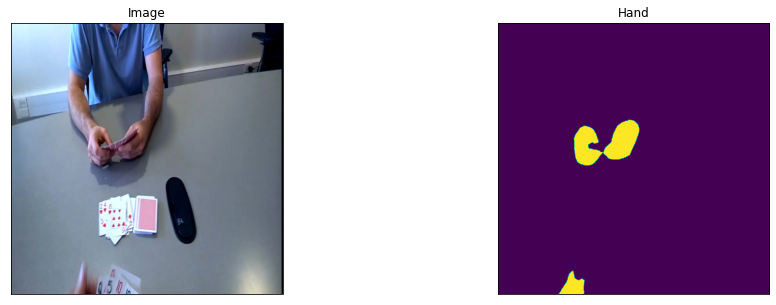

In [ ]:
gtf.Predict("seg_hand_trained/test/img10.png", vis=True); #path of the image in the traine model folder should be used.

# Training your own segmenter 

## Dataset Credits
    - http://vision.soic.indiana.edu/projects/egohands/

## Steps to create dataset
     -We obtain the egohands images from the link given above.
     -The dataset also has matlab codes usinng which we can obtain the masked images.
     -We store the original Hand Image which are innitially saved in different category folders to a seperate folder Hand_Img.
     -The masked images obtained after running the matlab codes are stored in a seperate folder i.e. Hand_Annot.
     -We need to make sure that list of images and labels are in same order else label mapping will not be correct.
     -After obtaining seperate folders Hand_Img and Hand_Annot we can upload them onto our notebook and use it accordingly.

-The path given below will be the path of the two folders
Hand_Annot and Hand_Img which are obtained after following steps to create the dataset.

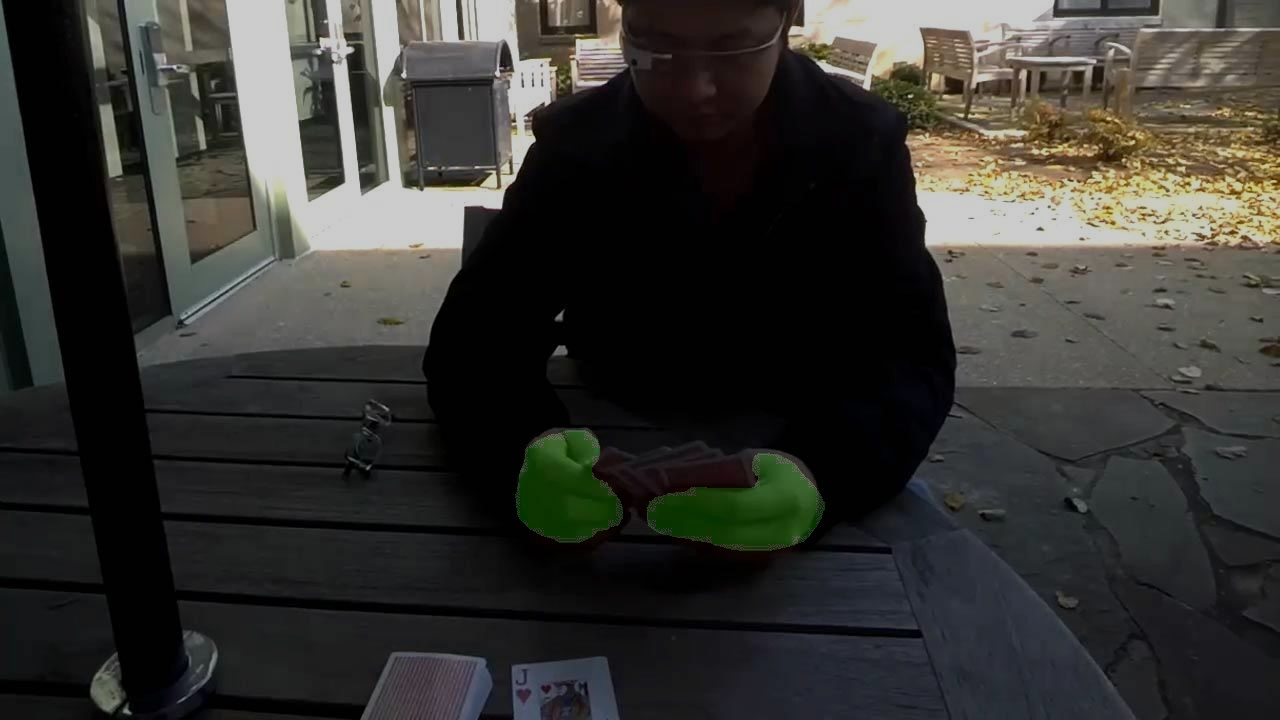

In [ ]:
import cv2
import numpy as np
mask = cv2.imread("vision.soic.indiana.edu/projects/egohands/Hand_Annot/frame1.jpg", 1);
img = cv2.imread("vision.soic.indiana.edu/projects/egohands/Hand_Img/frame_1.jpg", 1);
mask[np.where((mask==[255,255,255]).all(axis=2))] = [0,255,0]



dst = cv2.addWeighted(img, 0.8, mask, 0.2, 0);
cv2.imwrite("overlayed.jpg", dst);

from IPython.display import Image
Image(filename="overlayed.jpg") 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("vision.soic.indiana.edu/projects/egohands/Hand_Img/frame_1.jpg", 1)
cv2.imwrite("tmp.jpg", img)

True

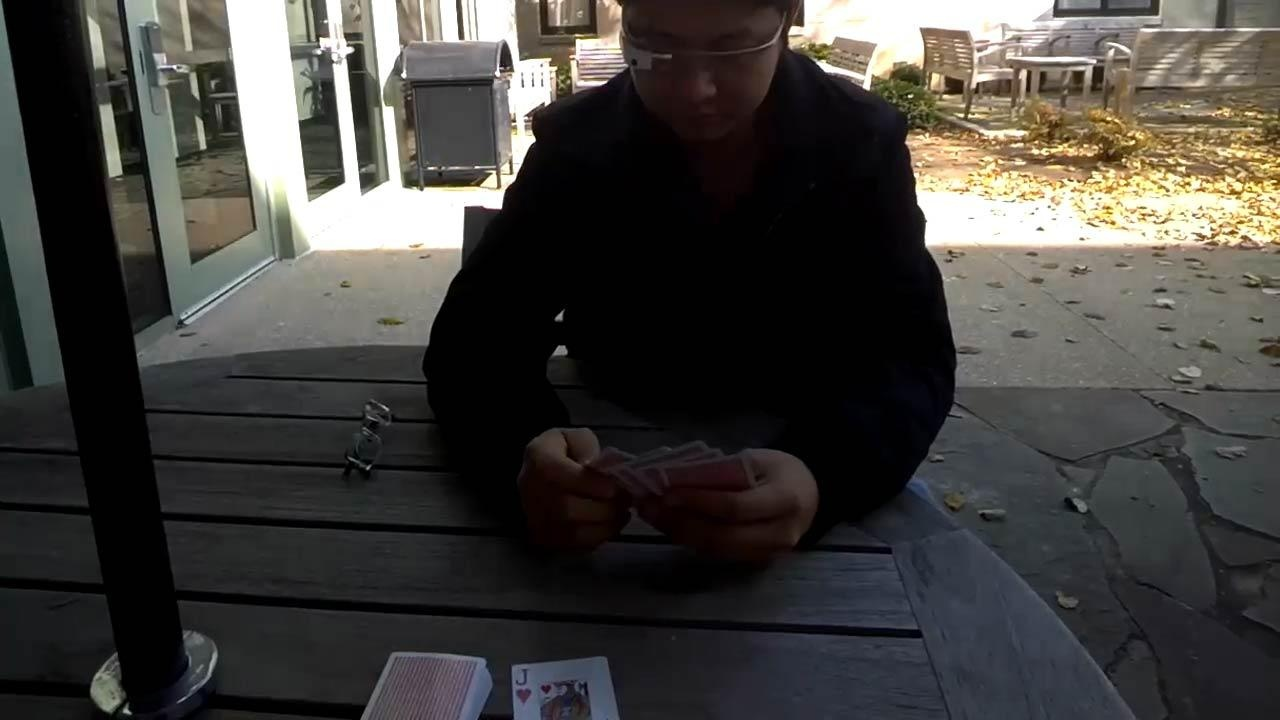

In [ ]:
from IPython.display import Image
Image(filename="tmp.jpg") 

In [ ]:
import os


img_list = sorted(os.listdir("vision.soic.indiana.edu/projects/egohands/Hand_Img"));
mask_list = sorted(os.listdir("vision.soic.indiana.edu/projects/egohands/Hand_Annot"));



In [ ]:
import os 


os.mkdir("/content/train")
os.mkdir("/content/train/img31");
os.mkdir("/content/train/mask31");


os.mkdir("/content/val")
os.mkdir("/content/img31");
os.mkdir("/content/val/mask31");

In [ ]:
import cv2
import numpy as np

from tqdm.notebook import tqdm

for i in tqdm(range(len(img_list))):
    img_path = "vision.soic.indiana.edu/projects/egohands/Hand_Img/"+img_list[i];
    img = cv2.imread(img_path, 1);
    
    
    cv2.imwrite("/content/train/img31/img"+str(i+1)+".png" ,img);
    
for i in tqdm(range(100)):
    img_path = "vision.soic.indiana.edu/projects/egohands/Hand_Img/"+img_list[i];
    img = cv2.imread(img_path, 1);
    
    cv2.imwrite("/content/val/img31/img"+str(i+1)+".png", img);

In [ ]:
import cv2
import numpy as np
from tqdm.notebook import tqdm

for i in tqdm(range(len(mask_list))):
    img_path = "vision.soic.indiana.edu/projects/egohands/Hand_Annot/"+mask_list[i];
    img = cv2.imread(img_path,0)
    img[img > 0 ] = 1;
    
    cv2.imwrite("/content/train/mask31/img" + str(i+1)+".png", img);
    
for i in tqdm(range(100)):
    img_path = "vision.soic.indiana.edu/projects/egohands/Hand_Annot/" + mask_list[i];   
    img = cv2.imread(img_path,0)
    img[img>0] = 1;
    
    cv2.imwrite("/content/val/mask31/img" +str(i+1)+".png", img);
    

# Monk Format

## Dataset Directory Structure

      root_dir
          |
          | 
          |         
          |----train
          |       |----img31
          |              |
          |              |---------img1.jpg
          |              |---------img2.jpg
          |                   |---------.........(and so on) 
          |
          |----train
          |       |----mask31
          |              |
          |              |---------img1.jpg
          |              |---------img2.jpg
          |                   |---------..........(and so on)
          |
          |----val (optional)
          |       |----img31
          |              |
          |              |---------img1.jpg
          |              |---------img2.jpg
          |                   |---------..........(and so on)
          |
          |----val
          |       |----mask31
          |              |
          |              |---------img1.jpg
          |              |---------img2.jpg
          |                   |---------..........(and so on)

          
          

# Sample Dataset Credits

    credits: http://vision.soic.indiana.edu/projects/egohands/

# Training

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from train_segmentation import Segmenter

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [ ]:
gtf = Segmenter();

In [ ]:
img_dir = "/content/train/img31";
mask_dir = "/content/train/mask31";


In [ ]:
mask_dir

In [ ]:
classes_dict = {
    'background': 0, 
    'hand': 1    
};
classes_to_train = [ 'hand'];

In [ ]:
gtf.Train_Dataset(img_dir, mask_dir, classes_dict, classes_to_train)

In [ ]:
img_dir = "/content/drive/My Drive/val/img31";
mask_dir = "/content/drive/My Drive/val/mask31";

In [ ]:
gtf.Val_Dataset(img_dir, mask_dir)

In [ ]:
gtf.List_Backbones();

Available backbones - ['vgg16', 'vgg19', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'seresnet18', 'seresnet34', 'seresnet50', 'seresnet101', 'seresnet152', 'resnext50', 'resnext101', 'seresnext50', 'seresnext101', 'senet154', 'densenet121', 'densenet169', 'densenet201', 'inceptionv3', 'inceptionresnetv2', 'mobilenet', 'mobilenetv2', 'efficientnetb0', 'efficientnetb1', 'efficientnetb2', 'efficientnetb3', 'efficientnetb4', 'efficientnetb5', 'efficientnetb6', 'efficientnetb7']


In [ ]:
gtf.Data_Params(batch_size=10, backbone="efficientnetb3",image_shape = [720,1280])

In [ ]:
gtf.List_Models();

Available models - ['Unet', 'FPN', 'Linknet', 'PSPNet']


In [ ]:
gtf.Model_Params(model="Unet")

In [ ]:
gtf.Train_Params(lr=0.0001)

In [ ]:
gtf.Setup();












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
44113920/44107200 [==============================] - 1s 0us/step






In [ ]:
gtf.Train(num_epochs=5);

Epoch 1/5
480/480 [==============================] - 3155s 7s/step - loss: 0.4990 - iou_score: 0.5810 - f1-score: 0.7184 - val_loss: 0.4358 - val_iou_score: 0.6497 - val_f1-score: 0.7849
Epoch 2/5
480/480 [==============================] - 340s 709ms/step - loss: 0.3018 - iou_score: 0.6795 - f1-score: 0.8010 - val_loss: 0.2379 - val_iou_score: 0.7328 - val_f1-score: 0.8434
Epoch 3/5
480/480 [==============================] - 343s 715ms/step - loss: 0.2683 - iou_score: 0.6953 - f1-score: 0.8105 - val_loss: 0.2607 - val_iou_score: 0.6852 - val_f1-score: 0.8071
Epoch 4/5
480/480 [==============================] - 341s 710ms/step - loss: 0.2389 - iou_score: 0.7182 - f1-score: 0.8282 - val_loss: 0.2013 - val_iou_score: 0.7256 - val_f1-score: 0.8387
Epoch 5/5
480/480 [==============================] - 338s 703ms/step - loss: 0.2250 - iou_score: 0.7323 - f1-score: 0.8375 - val_loss: 0.1771 - val_iou_score: 0.7633 - val_f1-score: 0.8639


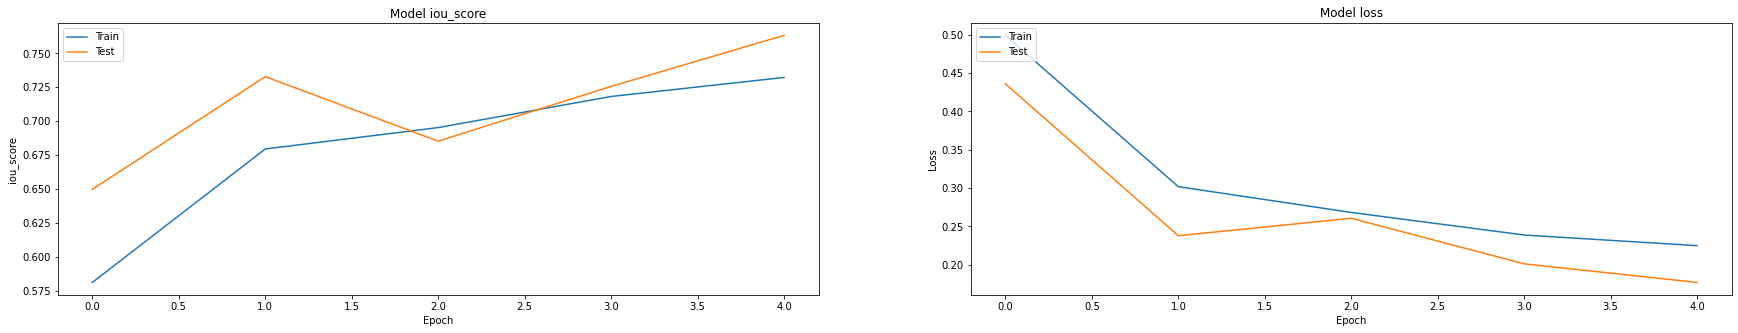

In [ ]:
gtf.Visualize_Training_History();

# Inference

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from infer_segmentation import Infer

In [ ]:
gtf = Infer();

In [ ]:
classes_dict = {
    'background': 0,
    'hand': 1
};
classes_to_train = ['hand'];

In [ ]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[716,1024])

In [ ]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='best_model.h5')

In [ ]:
gtf.Setup();

In [ ]:

from PIL import Image
img = Image.open("/content/train/img31/img100.png")
img = img.resize((1024,1024))
img.save('tmp_img.png')

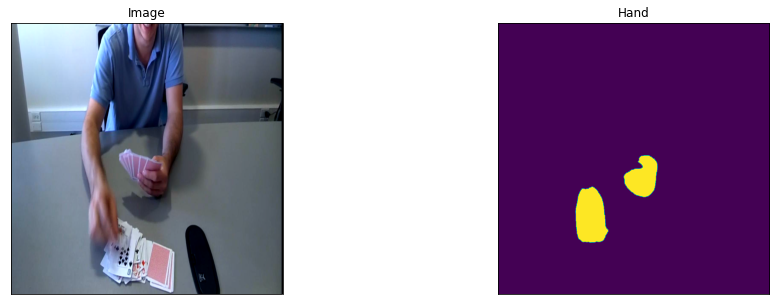

In [ ]:
gtf.Predict("/content/tmp_img.png", vis=True);